In [72]:
# -*- coding:utf-8 -*-
import cv2
import matplotlib.pyplot as plt
import numpy as np
def show_rgb(img):
    img_2 = img[:,:,::-1]
    plt.imshow(img_2)
    plt.show()
def show(img):
    plt.imshow(img,cmap='gray')
    plt.show()
img = cv2.imread('../../data/img/inhold_egg/test/420.jpg')

In [75]:
# show_rgb(img)
img_b, img_g, img_r= cv2.split(img)
img_b = cv2.resize(img_b, (960, 540))
# show(img_b)
# reverse
img_rev = 255 - img_b
circles = cv2.HoughCircles(img_rev,cv2.HOUGH_GRADIENT,1,600,
                            param1=50,param2=50,minRadius=352,maxRadius=470)
circles = np.uint16(np.around(circles))
img_draw = img_rev.copy()
# for i in circles[0,:]:
#     cv2.circle(img_draw,(i[0],i[1]),i[2],(0,255,0),2)
#     cv2.circle(img_draw,(i[0],i[1]),2,(0,0,255),3)
# show(img_draw)
min = np.argmin(circles[0,:], axis=0)[0]
circle = circles[0,:][min]
mask = np.full(img.shape[:2], 0, dtype=np.uint8)
mask = cv2.circle(mask, (circle[0], circle[1]), circle[2], (255, 255, 255),-1)
img_draw = cv2.bitwise_and(img_draw, img_draw, mask=mask)
y1 = int(circle[1])-circle[2] if (int(circle[1])-circle[2]) > 0 else 0
y2 = int(circle[1])+circle[2] if (int(circle[1])+circle[2]) < 1080 else 1080
x1 = int(circle[0])-circle[2] if (int(circle[0])-circle[2]) > 0 else 0
x2 = int(circle[0])+circle[2] if (int(circle[0])+circle[2]) < 1920 else 1920
img_draw = img_draw[y1:y2, x1:x2]
# show(img_draw)
ret, img_th = cv2.threshold(img_draw,170,255,cv2.THRESH_BINARY)
# show(img_th)
# find contours in the binary image
contours, hierarchy = cv2.findContours(img_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    # calculate moments for each contour
    M = cv2.moments(c)
    # print(f'area:{cv2.contourArea(c)}, M["m00"]: {M["m00"]}')
    if 1800 < cv2.contourArea(c) < 3000:
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(img_draw, (cX, cY), 5, (255, 0, 0), -1)
        cv2.putText(img_draw, f'({cX}, {cY})', (cX - 25, cY - 25), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 255), 2)
# show(img_draw)
# cv2.imwrite('center.jpg', img_draw)


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable rint method

In [58]:
print(392*0.9)
print(392*1.1)


352.8
431.20000000000005


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


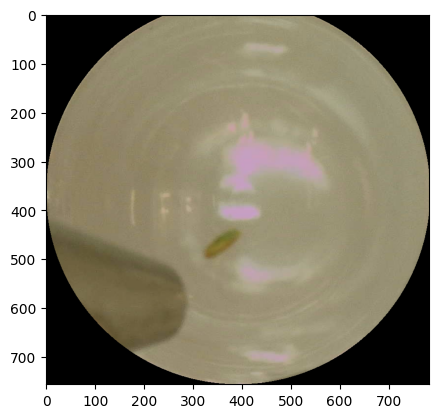

In [43]:

print(img_draw)
show_rgb(img_draw)
# print(img_draw)
# print(circle)

In [36]:
int(circle[1])-circle[2]

-28

In [22]:
circles[0,:]

array([[1684,  392,  391],
       [ 646,  394,  393]], dtype=uint16)